Importing the dependencies (Library)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split #split the original data into training and test data
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score # accuracy_score is used to check how well our model is

Data collections and processing

In [2]:
# loading a csv data in pandas dataframe
heart_data = pd.read_csv('heart (1).csv')

In [3]:
# print the first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# print last 5 rows 
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# printing number of rows and column in the dataset
heart_data.shape

(303, 14)

In [6]:
heart_data.keys()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
# getting some more info
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# checking for missing values
heart_data.isnull().sum()   # here there are no missing values so we don't have to handle missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# statistical measure of the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# checking the distribution of target variable
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Defective Heart - 0  <br>
Healthy Heart   - 1 <br>
<br>Splitting the features (every attribute except target) and target

In [11]:
x = heart_data.drop(columns = ['target','restecg','oldpeak', 'slope', 'exang'], axis = 1)  # features  --> dropping target column i.e axis = 1
y = heart_data['target'] # target

In [12]:
print(x)

     age  sex  cp  trestbps  chol  fbs  thalach  ca  thal
0     63    1   3       145   233    1      150   0     1
1     37    1   2       130   250    0      187   0     2
2     41    0   1       130   204    0      172   0     2
3     56    1   1       120   236    0      178   0     2
4     57    0   0       120   354    0      163   0     2
..   ...  ...  ..       ...   ...  ...      ...  ..   ...
298   57    0   0       140   241    0      123   0     3
299   45    1   3       110   264    0      132   0     3
300   68    1   0       144   193    1      141   2     3
301   57    1   0       130   131    0      115   1     3
302   57    0   1       130   236    0      174   1     2

[303 rows x 9 columns]


In [13]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Splitting the data in training data and testing data

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, stratify= y, random_state= 2 )

# test_size = 0.2 -> using 20% of the data for test, stratify = y -> distributing equal amount of 0 and 1 target

In [15]:
print(x.shape, x_train.shape, x_test.shape)

(303, 9) (242, 9) (61, 9)


Model Training
<br> Logistic Regression

In [16]:
model = LogisticRegression()

In [17]:
model.fit(x_train, y_train)

c:\users\anjali bhatt\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation
<br> Accuracy score

In [18]:
# accuracy on training data

x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [19]:
print(training_data_accuracy)  # 85 % of prediction are correct using training data

0.8429752066115702


In [20]:
# accuracy on test data

x_test_prediction = model.predict(x_test)
training_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [21]:
print(training_data_accuracy) # 81 % of prediction are correct using test data

0.7868852459016393


Building a predictive system

In [22]:
input_data = (37,1,2,130,250,0,187,0,2)

# change input_data to numpy array

input_data1 = np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance

final = input_data1.reshape(1, -1)

prediction = model.predict(final)

if(prediction[0] == 0):
    print("The person does not have heart disease")
else:
    print("The person has heart disease")


The person has heart disease


In [23]:
# https://www.kaggle.com/chingchunyeh/heart-disease-report

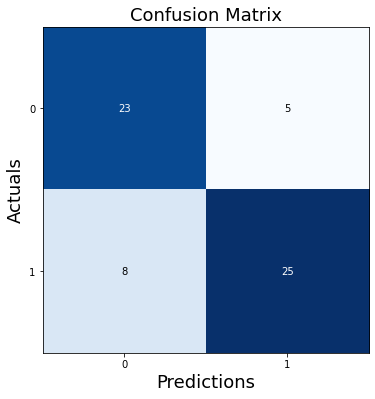

In [27]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
y_pred_test = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred_test)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()